In [15]:
#Step-1: Data Cleaning and Pre-Processing:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('used_cars.csv')

# Display the first few rows
print(data.head())

# Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical columns to numerical using OneHotEncoder
categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'color']
data = pd.get_dummies(data, columns=categorical_cols)

# Split the dataset into features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     make    model  year  mileage fuel_type transmission   color  price
0  Toyota  Corolla  2015    60000    Petrol    Automatic     Red  10000
1   Honda    Civic  2016    30000    Petrol       Manual    Blue  20000
2    Ford    Focus  2017    50000    Diesel    Automatic   Black  30000
3     BMW       X3  2018    45000    Petrol       Manual   White  40000
4    Audi       A4  2019    25000    Diesel    Automatic  Silver  50000


C:\Users\KAVITHA HOME PC\AppData\Local\Temp\ipykernel_2900\4259220131.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


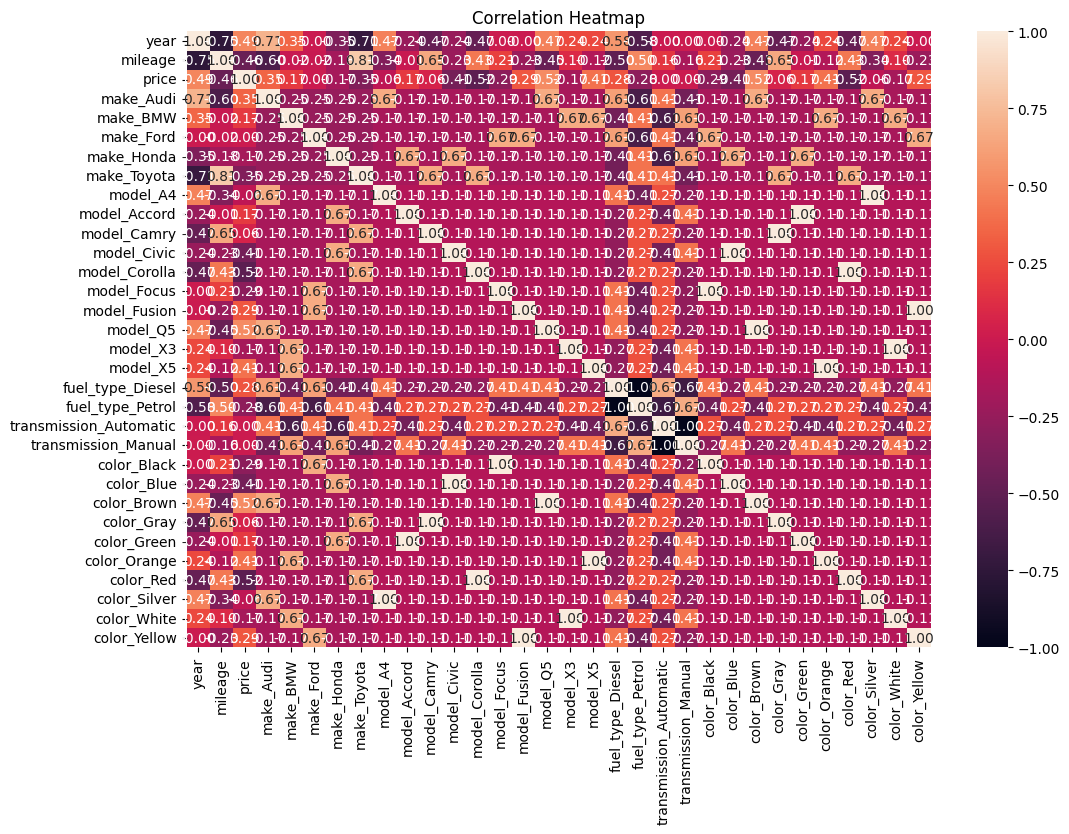

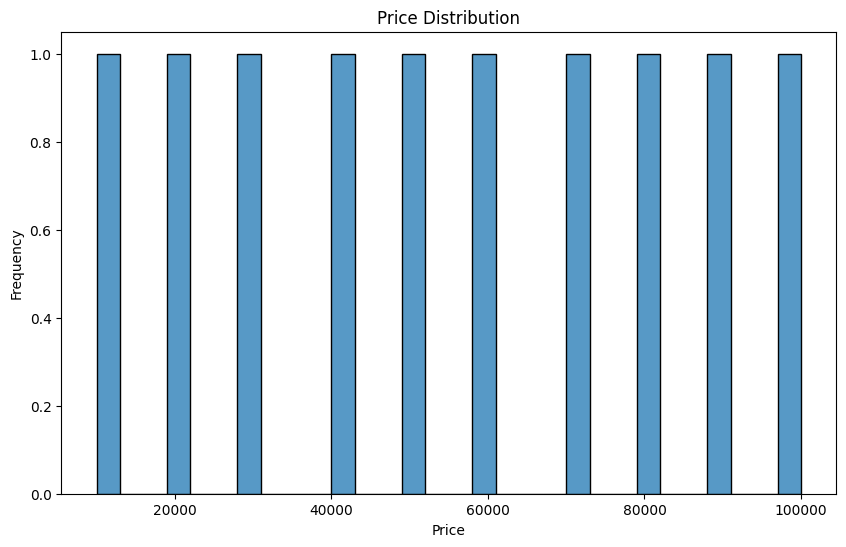

In [2]:
#Step-2: Exploratory Data Analysis (EDA):

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Plotting price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [3]:
#Step-3: Machine Learning Model Development:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model development
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [5]:
#Step 4: Model Evaluation and Optimization:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1538825000.0
R-squared: -0.25618367346938786


In [8]:
#Step 5: Model Deployment:

import joblib
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']

In [13]:
#Step 6: Streamlit Application Development:

import streamlit as st

# Load the model
model = joblib.load('car_price_model.pkl')

# Streamlit UI
st.title("Car Dheko - Used Car Price Prediction")
if st.button("Predict Price"):
    input_data = pd.DataFrame({
        'make': [make],
        'model': [model],
        'year': [year],
        'mileage': [mileage],
        'fuel_type': [fuel_type],
        'transmission': [transmission],
        'color': [color]
    })
    input_data = pd.get_dummies(input_data)
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    predicted_price = model.predict(input_data)
    st.write(f"Predicted Price: ${predicted_price[0]:,.2f}")
# Button to predict
if st.button('Predict Price'):
    input_data = [[make, model, mileage, engine_size]]
    prediction = model.predict(input_data)
    st.write(f'Predicted Price: ${prediction[0]:,.2f}')

2024-10-29 06:09:13.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 06:09:13.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar